# Using Age, Exercise-Induced ST Depression, and Maximum To Predict the Likelyhood of Heart Disease

### Adwait Kulkarni, Jessica Chen, Kevin Kercher

# Introduction

Heart disease is considered a significant cause of mortality around the world. Due to difficulties in providing accurate diagnoses, experts have turned to machine learning techniques to provide more accurate results to reduce the chances of misdiagnoses and fatalities caused by cardiovascular diseases. 

Specifically, factors like age, exercise-induced ST depression, and heart rate have been found to affect the risk of heart disease. Aging may cause changes in an individual's heart and veins, leading to higher risks of heart disease (NIH National Institute on Aging, 2018). Exercise-induced ST depression is a symptom associated with obstructive coronary artery disease (NIH, 2004). Heart rate (high or low) can indicate potential heart disease (Harvard, 2023).

We will be exploring [the heart disease Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease). The Cleveland database includes 302 rows and 14 variables.

It is a multivariate dataset with categorical, integer, and real variables. There are also variables with missing values (ca and thal)

We will be using the predictors age, exercise-induced ST depression, and maximum heart rate to predict whether or not an individual will be diagnosed with heart disease. 

Question: **How do a patient's age, exercise-induced ST depression, and maximum heart rate tell us about the likelihood of the patient being diagnosed with heart disease?**

# Preliminary Exploratory Data Analysis

In [11]:
import pandas as pd
import altair as alt
from sklearn import set_config
from sklearn.model_selection import (
    train_test_split,
)
# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [12]:
url = "https://github.com/AdwaitKulkarni58/dsci100-2023W2-group14/files/14530299/processed_cleveland.csv"
data = pd.read_csv(url)
data.columns = ["Age_Of_Patient", "Sex_Of_Patient", "Chest_Pain_Type", "Resting_Blood_Pressure", "Serum_Cholestrol", 
                "Fasting_Blood_Sugar", "Resting_Electrocardiographic_Results", "Maximum_Heart_Rate", "Exercise_Induced_Angina",
                "ST_Depression_Induced_By_Exercise_Relative_To_Rest", "Peak_Exercise_ST_Segment_Slope", "Number_Of_Colored_Major_Vessels",
                "Thal", "num"]
training_data, testing_data = train_test_split(data, test_size=0.25, random_state=123)
training_data.head(25)

,Age_Of_Patient,Sex_Of_Patient,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression_Induced_By_Exercise_Relative_To_Rest,Peak_Exercise_ST_Segment_Slope,Number_Of_Colored_Major_Vessels,Thal,num
36,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1
147,45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0,0
21,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
254,42.0,0.0,3.0,120.0,209.0,0.0,0.0,173.0,0.0,0.0,2.0,0.0,3.0,0
160,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4
114,41.0,1.0,2.0,135.0,203.0,0.0,0.0,132.0,0.0,0.0,2.0,0.0,6.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
249,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0
82,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3
279,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2


In [54]:
training_data.describe()

,Age_Of_Patient,Serum_Cholestrol,Resting_Blood_Pressure,Maximum_Heart_Rate,ST_Depression_Induced_By_Exercise_Relative_To_Rest,num
count,226.000000,226.00000,226.000000,226.000000,226.000000,226.000000
mean,54.075221,246.10177,131.389381,150.269912,1.032743,0.920354
std,9.100848,53.88476,18.092077,22.906625,1.120313,1.258864
min,29.000000,131.00000,94.000000,71.000000,0.000000,0.000000
25%,48.000000,207.25000,120.000000,133.250000,0.000000,0.000000
50%,55.000000,239.00000,130.000000,154.000000,0.800000,0.000000
75%,60.000000,276.75000,140.000000,168.000000,1.600000,2.000000
max,77.000000,564.00000,200.000000,202.000000,5.600000,4.000000


In [14]:
training_data = training_data[["Age_Of_Patient", "Serum_Cholestrol", "Resting_Blood_Pressure", "Maximum_Heart_Rate", "ST_Depression_Induced_By_Exercise_Relative_To_Rest", "Number_Of_Colored_Major_Vessels", "num"]]
training_data = training_data.assign(Diagnosis_Of_Heart_Disease = training_data[["num"]])
training_data["Diagnosis_Of_Heart_Disease"] = training_data["Diagnosis_Of_Heart_Disease"].replace({0.0 : False, 1.0: True, 2: True, 3: True, 4: True})
training_data.head(50)

,Age_Of_Patient,Serum_Cholestrol,Resting_Blood_Pressure,Maximum_Heart_Rate,ST_Depression_Induced_By_Exercise_Relative_To_Rest,Number_Of_Colored_Major_Vessels,num,Diagnosis_Of_Heart_Disease
36,57.0,276.0,150.0,112.0,0.6,1.0,1,True
147,45.0,308.0,128.0,170.0,0.0,0.0,0,False
21,58.0,284.0,120.0,160.0,1.8,0.0,1,True
254,42.0,209.0,120.0,173.0,0.0,0.0,0,False
160,77.0,304.0,125.0,162.0,0.0,3.0,4,True
114,41.0,203.0,135.0,132.0,0.0,0.0,0,False
5,62.0,268.0,140.0,160.0,3.6,2.0,3,True
249,57.0,201.0,110.0,126.0,1.5,0.0,0,False
82,68.0,274.0,180.0,150.0,1.6,0.0,3,True
279,57.0,335.0,110.0,143.0,3.0,1.0,2,True


In [52]:
age_vs_mhr_plot = alt.Chart(training_data).mark_circle().encode(
    x=alt.X("Age_Of_Patient").title("Age of patient").scale(zero=False),
    y=alt.Y("Maximum_Heart_Rate").title("Maximum Heart Rate").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)
age_vs_st_depression_plot = alt.Chart(training_data).mark_circle().encode(
    x=alt.X("Age_Of_Patient").title("Age of patient"),
    y=alt.Y("ST_Depression_Induced_By_Exercise_Relative_To_Rest").title("ST Depression Induced").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)
mhr_vs_st_depression_plot = alt.Chart(training_data).mark_circle().encode(
    x=alt.X("Maximum_Heart_Rate").title("Maximum Heart Rate"),
    y=alt.Y("ST_Depression_Induced_By_Exercise_Relative_To_Rest").title("ST Depression Induced").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)

age_vs_mhr_plot|age_vs_st_depression_plot|mhr_vs_st_depression_plot

alt.HConcatChart(...)

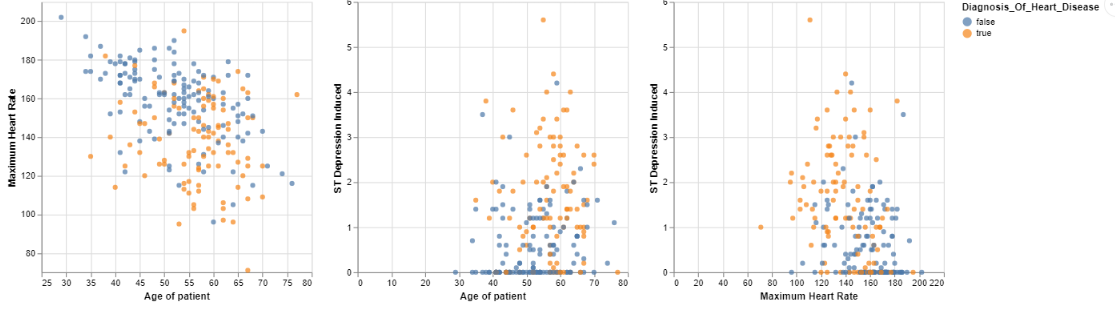

# Methods 

We renamed the columns from the original dataset to have better, more descriptive names. For our analysis, we will be using the predictor columns: **Age_Of_Patient, Maximum_Heart_Rate, and ST_Depression_Induced_By_Exercise_Relative_To_Rest** to classify whether an individual is predicted to have heart disease or not.

The columns of the original dataset are as follows, the renamed columns are added in parentheses:  
    - **Age (Age_Of_Patient)** (Years)  
    - **Sex (Sex_Of_Patient)** (1=male, 0=female)  
    - **CP (Chest_Pain_Type)**: Chest pain type (Value 1: typical angina,  Value 2: atypical angina, - Value 3: non-anginal pa, -- Value 4: asymptomatic)  
    - **trestbps (Resting_Blood_Pressure)**: Resting blood pressure (mm HG)  
    - **chol (Serum_Cholestrol)**: Serum cholesterol (mg/dl)  
    - **fbs (Fasting_Blood_Pressure)**: Fasting blood sugar>120mg/dl (1=true,0=false)  
    - **restecg (Resting_Electrocardiographic_Results)**: resting electrocardiographic results (0=normal, 1= has ST-T wave abnormality)  
    - **thalach (Maximum_Heart_Rate)**: max heart rate achieved  
    - **exang (Exercise_Induced_Angina)**: Exercise-induced agina (1=yes, 0=no)  
    - **oldpeak (ST_Depression_Induced_By_Exercise_Relative_To_Rest)**: ST depression induced by exercise relative to rest  
    - **slope (Peak_Exercise_ST_Segment_Slope)**: Slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)  
    - **ca (Number_Of_Colored_Major_Vessels)**: Number of major vessels(0-3)  
    - **thal (Thal)**: 3=normal, 6=fixed defect, 7=reversable defect  
    - **num (num)**: Diagnosis of heart disease (0=absence, 1,2,3,4= present)

There are a total of 303 rows and 14 columns in the original dataset. The predictor variables that we are using don't have any missing (N/A) values and the provided data is already in tidy format.  

We first split the data into training and testing datasets with the division as **75%** and **25%** respectively. We set the testing set apart and only used the training set for our data analysis.

We added a new column called **Diagnosis of Heart Disease** (**num** in the original variable names) containing boolean values. We changed the numeric values from the original **num** column to contain the boolean variables True and False with a True value corresponding to a patient having a chance of getting heart disease (1, 2, 3, 4) and a False value corresponding to a patient having no chance of having heart disease (0).

In order to decide which predictors would be the most beneficial to predict our final diagnosis, we first separated the categorical variables from the non-categorical ones. After that, we plotted a variety of graphs between different possible predictor values using scatterplots to clearly visualize the relationship between 2 independent variables..

The data points in these graphs were colored by the boolean value of our diagnosis variable and that allowed us to clearly visualize different trends amongst the possible predictor variables. The graphs we plotted included **age** of the patient versus their **maximum heart rate**, **age** and **ST depression induced by exercise relative to rest**, and the **maximum heart rate** and **ST depression induced by exercise relative to rest**.

# Expected outcomes and significance

We expect to find a trend and relationship between a patient's age, heart rate, and exercise-induced ST depression and whether they will get diagnosed with heart disease (i.e. patients with older age, higher exercise-induced ST depression, and a lower maximum heart rate is predicted to have heart disease).

With these findings, we can make diagnosing heart disease more efficient and accurate, reducing the chances of misdiagnosis and the fatality rates of heart disease.

With our findings, other researchers may be able to further research the causation between the relationships found in our analysis. Since we know correlation does not equal causation, others may be able to research what specifically causes these trends.  

Some questions that we can answer in the future with this analysis would be:  
1) If we reduce the impact of one of our predictors, how much does the risk of heart disease reduce?
2) What methods can we employ to treat heart disease in patients with old age, given the risk of other potential diseases?